In [53]:
import matplotlib.pyplot as plt
import numpy as np

In [54]:
import csv
with open("main.csv") as csvfile:
    data = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    array = []
    for line in data:
        array.append(line)

Lithology:
Basin Fill from 0 to 1007 m
Granitoid from 1007 m to 2296.9 m

Coordinates: x = 335380.766, y = 4263040.83, z = 1681.61659

Depth: 2296.9 m

In [55]:
data = np.array(array)


DEPTH = data[:,1] #DEPTH (M)


CDF = data[:,19] #NA
CTFC = data[:,20]
CNTC = data[:,21] 
CTEM = data[:,22]
DSOZ = data[:,23]
ED = data[:,28]
GDEV = data[:,29]
GTEM = data[:,32]
HDRB = data[:,35]
HMIN = data[:,37]
HMNO = data[:,38]
HPRA = data[:,40] #apparent resistivity?
ND = data[:,42] #neutron density?
TENS = data[:,55]


#Caliper
HCAL = data[:,33]

#Shallow resistivity
AF10 = data[:,2]
AF20 = data[:,3]
AF30 = data[:,4]
AF60 = data[:,5]
AF90 = data[:,6]
AO10 = data[:,7]
AO20 = data[:,8]
AO30 = data[:,9]
AO60 = data[:,10]
AO90 = data[:,11]
AT10 = data[:,12]
AT20 = data[:,13]
AT30 = data[:,14]
AORX = data[:,18]
RXO8 = data[:,50]
RXOZ = data[:,51]

#Deep Resistivity
AT90 = data[:,16] #1
AT60 = data[:,15] #2
AORT = data[:,17] #3
ATCO10 = data[:,58] #1000/ATCO......5
ATCO20 = data[:,59] #1000/ATCO......5
ATCO30 = data[:,60] #1000/ATCO......5
ATCO60 = data[:,61] #1000/ATCO......5
ATCO90 = data[:,62] #1000/ATCO......5

#Density porosity
DPHZ = data[:,25]
DNPH = data[:,24]
PXND = data[:,46] #HILT?

#Density Correction
HDRA = data[:,34]


#Gamma Ray
ECGR = data[:,27]
GR = data[:,30]
GR_EDTC = data[:,31]
HGR = data[:,36]

#Neutron Porosity
HTNP_SAN = data[:,57] #1
NPHI = data[:,43] #2
NPOR = data[:,44] #2
HTNP = data[:,41] #2
TNPH = data[:,56] #2


#Photoelectric Effect
PEFZ = data[:,45]

#Bulk Density
RHOZ = data[:,47]

#Spontaneous Potential
SP = data[:,52]
SPAR = data[:,53] #apparent SP?

#Rwa
RWA = data[:,49] #HILT?



In [56]:
with open("trajectory.csv") as csvfile:
    data = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    array = []
    for line in data:
        array.append(line)

In [57]:
data = np.array(array)

traj_depth = data[:,0]
dip = data[:,1]
azimuth = data[:,2]

In [58]:
print(azimuth)

[  0.    20.59 205.9    1.   346.   347.   334.    24.5   83.8    8.7
 311.6  123.4  220.   253.9  255.8  253.8  272.33 275.84 272.2  271.98
 271.45 274.26 276.37 277.34 278.13 273.91 265.82 260.37 250.53 251.5
 267.32 281.9  295.97 295.97 277.51 251.7  241.83 243.5  231.37 203.24
 136.6  316.2  346.6  350.   334.9  287.3  274.1  279.53 276.37 281.12
 280.59 277.16 265.03 260.81 281.2  295.1  276.11 274.88 274.  ]


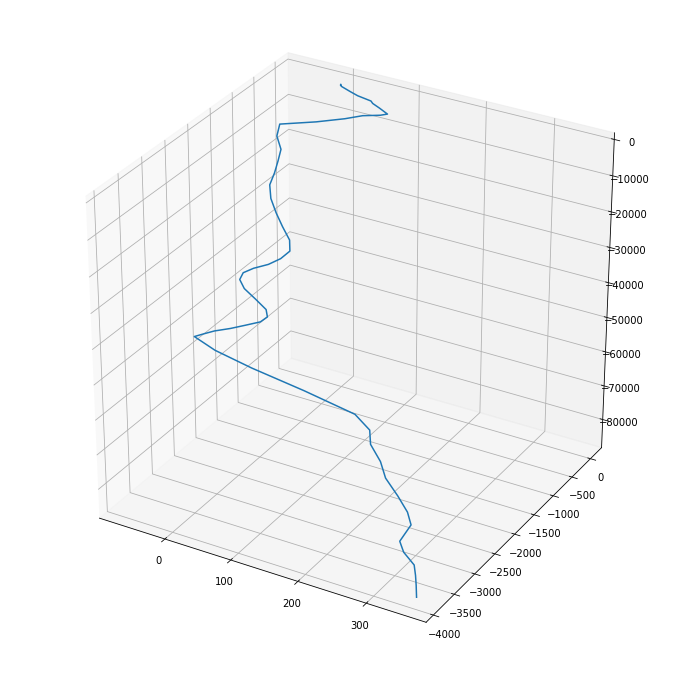

In [61]:
#Well trajectory
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection = '3d')
# several data points 

# get lengths of the separate segments 
#r[1:] = traj_depth[1:] - traj_depth[:-1]
# convert to radians
phi = azimuth * 2 * np.pi / 360.
# in spherical coordinates theta is measured from zenith down; you are measuring it from horizontal plane up 
theta = (90. + dip) * 2 * np.pi / 360.
# get x, y, z from known formulae
x = traj_depth*np.cos(phi)*np.sin(theta)
y = traj_depth*np.sin(phi)*np.sin(theta)
z = traj_depth*np.cos(theta)

# np.cumsum is employed to gradually sum resultant vectors 
ax.plot(np.cumsum(x),np.cumsum(y),np.cumsum(z))


plt.show()

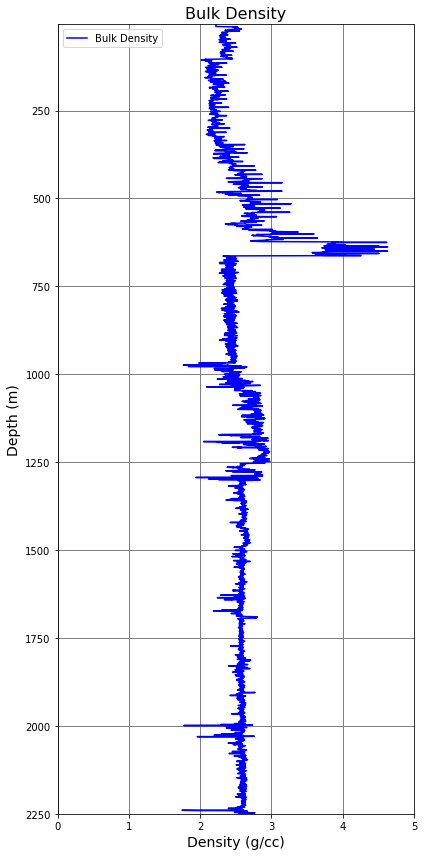

In [33]:
##Density Log

plt.figure(figsize = (6, 12))

plt.plot(RHOZ, DEPTH,'b', label='Bulk Density')
plt.ylabel('Depth (m)', fontsize = 14)
plt.xlabel('Density (g/cc)', fontsize=14)
plt.grid(color='grey', linestyle = '-', linewidth=1)
plt.gca().invert_yaxis()
plt.title("Bulk Density", fontsize=16)
plt.legend(loc='upper left')
plt.xlim(0, 5)
plt.ylim(2250, 5)
plt.grid(which='minor', alpha=0.2)
major_ticks = np.arange(0, 101, 20)


plt.tight_layout()
plt.show()

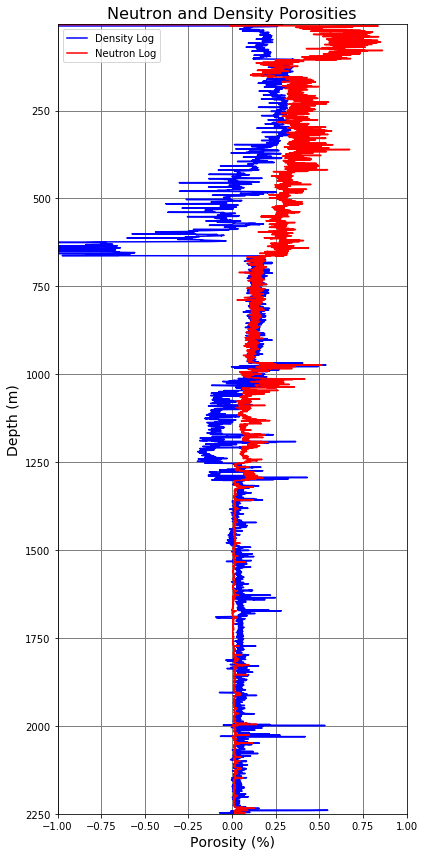

In [34]:
#Neutron and Density Porosity
plt.figure(figsize = (6, 12))

plt.plot(DPHZ, DEPTH,'b', label='Density Log')
plt.plot(NPHI, DEPTH, 'r', label='Neutron Log')
plt.ylabel('Depth (m)', fontsize = 14)
plt.xlabel('Porosity (%)', fontsize=14)
plt.grid(color='grey', linestyle = '-', linewidth=1)
plt.gca().invert_yaxis()
plt.title("Neutron and Density Porosities", fontsize=16)
plt.legend(loc='upper left')
plt.xlim(-1, 1)
plt.ylim(2250, 5)
plt.grid(which='minor', alpha=0.2)
major_ticks = np.arange(0, 101, 20)


plt.tight_layout()
plt.show()

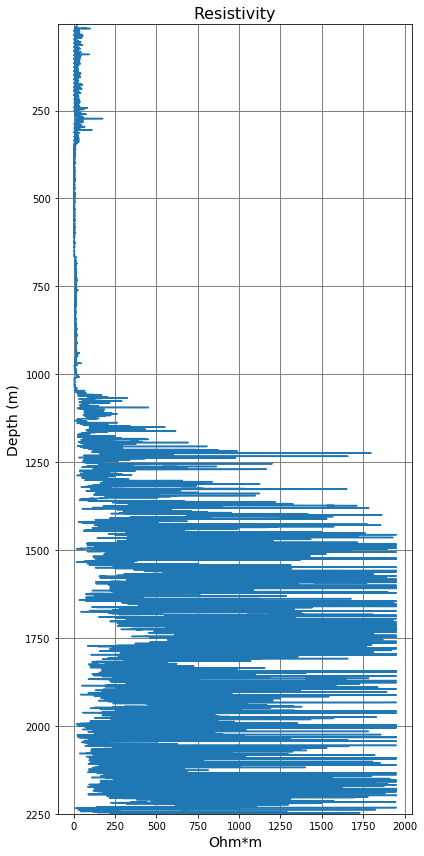

In [51]:
#Resistivity
plt.figure(figsize = (6, 12))

plt.plot(AT90, DEPTH)
plt.ylabel('Depth (m)', fontsize = 14)
plt.xlabel('Ohm*m', fontsize=14)
plt.grid(color='grey', linestyle = '-', linewidth=1)
plt.gca().invert_yaxis()
plt.title("Resistivity", fontsize=16)
plt.grid(which='minor', alpha=0.2)
plt.ylim(2250, 5)
major_ticks = np.arange(0, 101, 20)


plt.tight_layout()
plt.show()

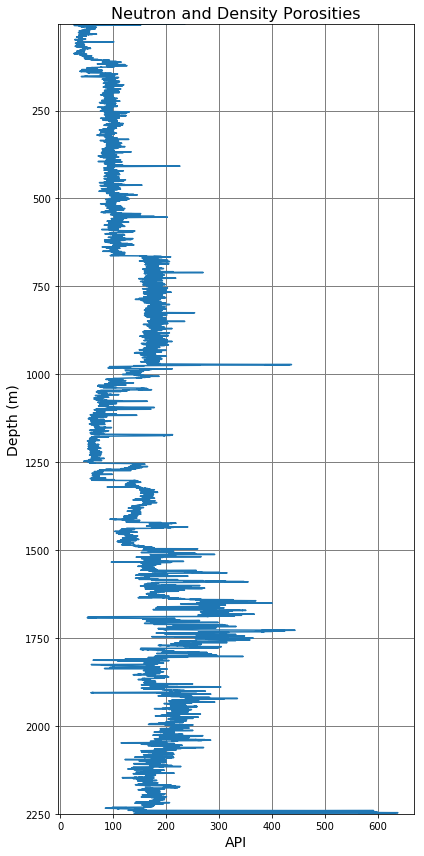

In [52]:
#Gamma Ray
plt.figure(figsize = (6, 12))

plt.plot(ECGR, DEPTH)
plt.ylabel('Depth (m)', fontsize = 14)
plt.xlabel('API', fontsize=14)
plt.grid(color='grey', linestyle = '-', linewidth=1)
plt.gca().invert_yaxis()
plt.title("Neutron and Density Porosities", fontsize=16)
plt.grid(which='minor', alpha=0.2)
plt.ylim(2250, 5)
major_ticks = np.arange(0, 101, 20)


plt.tight_layout()
plt.show()